In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm

## 1-  In view of the approximation of the integration

In [2]:
T=2
n=10
M=1000

def MB(T,M,n):
    pas = T/n
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,n))
    trajectoires=np.cumsum(echantillon, axis=1)
    
    return trajectoires

"We define the brownien motion here"
MB = MB(T,M,n)

"We define now the integrale approximations"
def I_n(MB,M,n):
    I = np.array([0]*M).T
    for i in range(1,n):
        I = I + (MB[:,i-1])*(MB[:,i]-MB[:,i-1])
    return I
def J_n(MB,M,n):
    J = np.array([0]*M).T
    for i in range(1,n):
        J = J + (MB[:,i])*(MB[:,i]-MB[:,i-1])
    return J
def K_n(MB,M,n):
    K = np.array([0]*M).T
    for i in range(1,n):
        K = K + ((MB[:,i]+MB[:,i-1])/2)*(MB[:,i]-MB[:,i-1])
    return K

"We simulate a samples of some copies"
I_T = 0.5*(MB[:,-1])**2-I_n(MB,M,n)
#print(I_T)
J_T = 0.5*(MB[:,-1])**2-J_n(MB,M,n)
#print(J_T)
K_T = 0.5*(MB[:,-1])**2-K_n(MB,M,n)
#print(K_T)
"We compute the sample means"
print('Mean with I_n : ',np.mean(I_T), '  Mean with J_n : ',np.mean(J_T),'  Mean with K_n : ',np.mean(K_T) )


Mean with I_n :  1.0181467919611233   Mean with J_n :  -0.7962117744764141   Mean with K_n :  0.11096750874235463


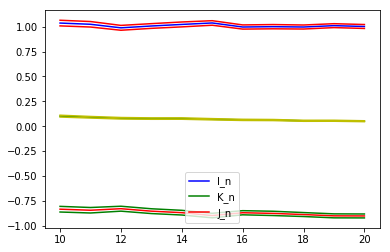

In [7]:
# Show the approximations means
mean_I = []
mean_J = []
mean_K = []
interv1 = [[],[]]
interv2 = [[],[]]
interv3 = [[],[]]
intergers = range(10,21)
for n in intergers:
    pas = T/n
    intergration = np.linspace(0,T,n)
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,n))

    MB=np.cumsum(echantillon, axis=1)
    
    I_T = 0.5*(MB[:,-1])**2-I_n(MB,M,n)
    J_T = 0.5*(MB[:,-1])**2-J_n(MB,M,n)
    K_T = 0.5*(MB[:,-1])**2-K_n(MB,M,n)
    mean_I.append(np.mean(I_T))
    interv1[0].append(np.mean(I_T)+1.96*np.sqrt(np.var(I_T)/M))
    interv1[1].append(np.mean(I_T)-1.96*np.sqrt(np.var(I_T)/M))
    mean_J.append(np.mean(J_T))
    interv2[0].append(np.mean(J_T)+1.96*np.sqrt(np.var(J_T)/M))
    interv2[1].append(np.mean(J_T)-1.96*np.sqrt(np.var(J_T)/M))
    mean_K.append(np.mean(K_T))
    interv3[0].append(np.mean(K_T)+1.96*np.sqrt(np.var(K_T)/M))
    interv3[1].append(np.mean(K_T)-1.96*np.sqrt(np.var(K_T)/M))

plt.plot(intergers,mean_I, color = 'b', label = "I_n")
plt.plot(intergers,interv1[0], color = 'r')
plt.plot(intergers,interv1[1], color = 'r')
plt.plot(intergers,mean_K, color = 'g', label = "K_n")
plt.plot(intergers,interv3[0], color = 'y')
plt.plot(intergers,interv3[1], color = 'y')
plt.plot(intergers,mean_J, color = 'r',  label = "J_n")
plt.plot(intergers,interv2[0], color = 'g')
plt.plot(intergers,interv2[1], color = 'g')

plt.xlabel()

plt.legend()

plt.show()

 The approximators K_n and J_n do not give a good approximation of the integral; it seem that the the J_n approximation is the opposite of the I_n approximation which is the good one; obviously, the K_n approximation is the arithmetic average of the two others. that experimentation proove that the good definition of the stochastic integrale is the one with the "point de gauche".

## 2- Same Question

In [9]:
T=2
n=10
M=1000

def MB(T,M,n):
    pas = T/n
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,n))
    trajectoires=np.cumsum(echantillon, axis=1)
    
    return trajectoires

"We define the brownien motion here"
MB = MB(T,M,n)

"We define now the integrale approximations"
def A_n(MB,M,n):
    I = np.array([0]*M).T
    for i in range(1,n):
        I = I + (np.exp((i-1)*T/n))*(MB[:,i]-MB[:,i-1])
    return I
def B_n(MB,M,n):
    J = np.array([0]*M).T
    for i in range(1,n):
        J = J + (np.exp(i*T/n))*(MB[:,i]-MB[:,i-1])
    return J
def C_n(MB,M,n):
    K = np.array([0]*M).T
    for i in range(1,n):
        K = K + (((np.exp((i-1)*T/n))+(np.exp(i*T/n)))/2)*(MB[:,i]-MB[:,i-1])
    return K

"We simulate a samples of some copies"
A_T = 0.5*(MB[:,-1])**2-A_n(MB,M,n)
#print(I_T)
B_T = 0.5*(MB[:,-1])**2-B_n(MB,M,n)
#print(J_T)
C_T = 0.5*(MB[:,-1])**2-C_n(MB,M,n)
#print(K_T)
"We compute the sample means"
print('Mean with A_n : ',np.mean(A_T), '  Mean with B_n : ',np.mean(B_T),'  Mean with C_n : ',np.mean(C_T) )

Mean with A_n :  0.9843827027034112   Mean with B_n :  0.9879635029399234   Mean with C_n :  0.9861731028216673


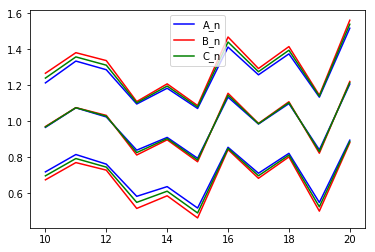

In [12]:
# Show the approximations means
mean_A = []
mean_B = []
mean_C = []
inter1 = [[],[]]
inter2 = [[],[]]
inter3 = [[],[]]
intergers = range(10,21)
for n in intergers:
    pas = T/n
    intergration = np.linspace(0,T,n)
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,n))

    MB=np.cumsum(echantillon, axis=1)
    
    A_T = 0.5*(MB[:,-1])**2-A_n(MB,M,n)
    B_T = 0.5*(MB[:,-1])**2-B_n(MB,M,n)
    C_T = 0.5*(MB[:,-1])**2-C_n(MB,M,n)
    mean_A.append(np.mean(A_T))
    inter1[0].append(np.mean(A_T)+1.96*np.sqrt(np.var(A_T)/M))
    inter1[1].append(np.mean(A_T)-1.96*np.sqrt(np.var(A_T)/M))
    mean_B.append(np.mean(B_T))
    inter2[0].append(np.mean(B_T)+1.96*np.sqrt(np.var(B_T)/M))
    inter2[1].append(np.mean(B_T)-1.96*np.sqrt(np.var(B_T)/M))
    mean_C.append(np.mean(C_T))
    inter3[0].append(np.mean(C_T)+1.96*np.sqrt(np.var(C_T)/M))
    inter3[1].append(np.mean(C_T)-1.96*np.sqrt(np.var(C_T)/M))

plt.plot(intergers,mean_A, color = 'b', label = "A_n")
plt.plot(intergers,inter1[0], color = 'b')
plt.plot(intergers,inter1[1], color = 'b')
plt.plot(intergers,mean_B, color = 'r',  label = "B_n")
plt.plot(intergers,inter2[0], color = 'r')
plt.plot(intergers,inter2[1], color = 'r')
plt.plot(intergers,mean_C, color = 'g', label = "C_n")
plt.plot(intergers,inter3[0], color = 'g')
plt.plot(intergers,inter3[1], color = 'g')

plt.legend()

plt.show()

Here the three approximations seem to be the same because the function is not a random process

## 3- Same question with A_n

In [23]:
def A_n(MB,M,n):
    A_n = np.sin(MB[:,-1])
    for i in range(1,n):
        A_n = A_n + (0.5/n)*np.sin(MB[:,i-1])
    return A_n

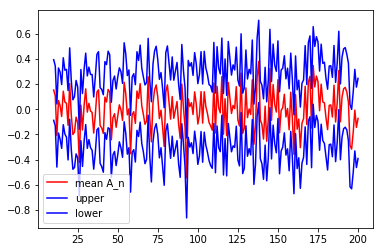

In [19]:
mean_A = []
interval=[[],[]]
intergers = range(10,201)
for n in intergers:
    pas = T/n
    intergration = np.linspace(0,T,n)
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,n))

    MB=np.cumsum(echantillon, axis=1)
    
    mean_A.append(np.mean(A_n(MB,M,n)))
    interval[0].append(np.mean(A_n(MB,M,n)+1.96*np.sqrt(np.var(A_n(MB,M,n))/M)))
    interval[1].append(np.mean(A_n(MB,M,n)-1.96*np.sqrt(np.var(A_n(MB,M,n))/M)))

plt.plot(intergers,mean_A, color = 'r', label = "mean A_n")
plt.plot(intergers,interval[0], color = 'b', label = "upper")
plt.plot(intergers,interval[1], color = 'b', label = "lower")
plt.legend()
plt.show()

The term of the A_n without sin(W_T) seem to be a Riemann intergration of the brownien motion; we observe that the converge is not sure; so we can't define a stochastic integration as a Riemann integration